3-Layer Neural Network: The choice between Softmax and SVM depends on your preference. Softmax is typical for classification tasks, while SVM loss might offer better margin-based separation.


Steps for 3-Layer Neural Network Implementation:


Load CIFAR-10 Dataset: Download and load the dataset into training and test sets.

Preprocess the Data: Normalize the image data and convert labels to categorical.

Define the Model: Create a 3-layer neural network with Dense layers.

Compile the Model: Choose the optimizer, loss function (Softmax or SVM), and metrics.

Train the Model: Fit the model on the training data and store the training history.

Evaluate Performance: Test the model, plot loss and accuracy curves, and display the confusion matrix.

Epoch 1/10
782/782 [==============================] - 16s 19ms/step - loss: 1.8707 - accuracy: 0.3312 - val_loss: 1.7176 - val_accuracy: 0.3782
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 1.6741 - accuracy: 0.4021 - val_loss: 1.6247 - val_accuracy: 0.4224
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 1.5786 - accuracy: 0.4364 - val_loss: 1.5698 - val_accuracy: 0.4368
Epoch 4/10
782/782 [==============================] - 15s 19ms/step - loss: 1.5228 - accuracy: 0.4559 - val_loss: 1.5456 - val_accuracy: 0.4532
Epoch 5/10
782/782 [==============================] - 15s 20ms/step - loss: 1.4834 - accuracy: 0.4712 - val_loss: 1.4754 - val_accuracy: 0.4737
Epoch 6/10
782/782 [==============================] - 15s 20ms/step - loss: 1.4512 - accuracy: 0.4815 - val_loss: 1.4697 - val_accuracy: 0.4773
Epoch 7/10
782/782 [==============================] - 15s 19ms/step - loss: 1.4208 - accuracy: 0.4919 - val_loss: 1.4314 - val_accuracy:

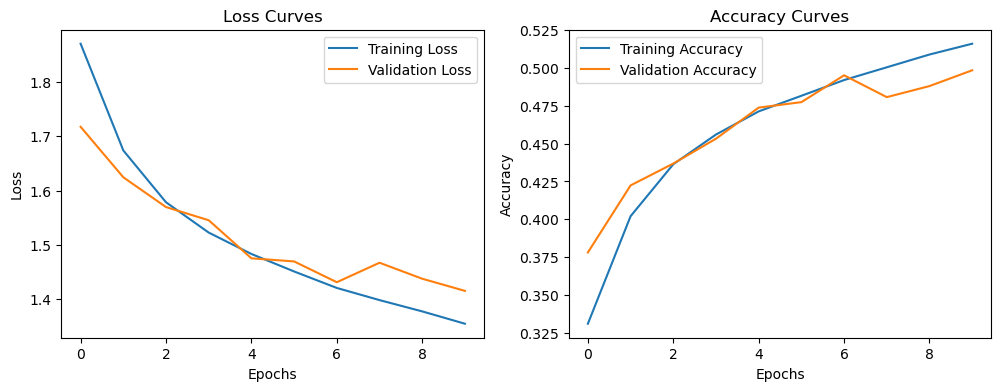

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a 3-layer neural network
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model and save the history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"3-Layer NN Accuracy: {test_acc * 100:.2f}%")

# Plotting loss and accuracy
plt.figure(figsize=(12, 4))

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


313/313 [==============================] - 1s 3ms/step


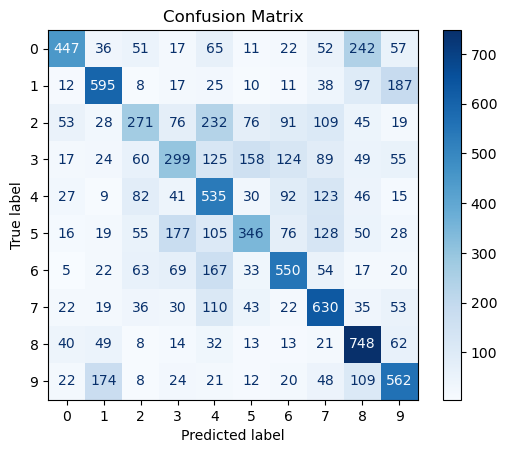

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the labels for the test set
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
